In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import initializers

# Training Deep Neural Networks (Dense Nets)
1. Easy way
2. The Expert way

In [6]:
# Data Preprocessing

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and flatten
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 784).astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 27s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


## Using Classes

In [7]:
class FashionDNN(tf.keras.Model):
    def __init__(self, hidden_units=[128, 64], num_classes=10):
        super().__init__()
        self.hidden = [layers.Dense(units, activation='relu') for units in hidden_units]
        self.dropout = layers.Dropout(0.3)
        self.out = layers.Dense(num_classes, activation='softmax')


    def call(self, x, training_flag=False):
        print(type(self.hidden), len(self.hidden))
        for h in self.hidden:
            x = h(x)
        if training_flag:
            x = self.dropout(x, training=training_flag)
        return self.out(x)

In [8]:
model = FashionDNN()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
1492/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7694 - loss: 0.6574<class 'keras.src.utils.tracking.TrackedList'> 2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8187 - loss: 0.5115 - val_accuracy: 0.8503 - val_loss: 0.4241
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8639 - loss: 0.3770 - val_accuracy: 0.8643 - val_loss: 0.3753
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8751 - loss: 0.3418 - val_accuracy: 0.8726 - val_loss: 0.3520
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8831 - loss: 0.3188 - val_accuracy: 0.8528 - val_loss: 0.3927
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8891 - loss: 0.3010 - val_accuracy: 0.8719 - val_loss: 0.3554


In [9]:
model = FashionDNN()
model.summary()
_ = model(tf.zeros((1, 420)))  # build weights lazily
model.summary()

Model: "fashion_dnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2


Model: "fashion_dnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (1, 128)               │        53,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 64)                │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,794 (245.29 KB)

 Trainable params: 62,794 (245.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
small_model = FashionDNN([64, 32])
big_model   = FashionDNN([256, 256, 128,63,31])

In [11]:
small_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("Training Smaller model")
history_small = small_model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

big_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training Bigger model")
history_big = big_model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Training Smaller model
Epoch 1/5
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 1.2011<class 'keras.src.utils.tracking.TrackedList'> 2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7207 - loss: 0.8423 - val_accuracy: 0.8083 - val_loss: 0.5664
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8198 - loss: 0.5291 - val_accuracy: 0.8296 - val_loss: 0.4873
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0.4759 - val_accuracy: 0.8364 - val_loss: 0.4662
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8436 - loss: 0.4471 - val_accuracy: 0.8447 - val_loss: 0.4471
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8499 - loss: 0.4284 - val_accuracy: 0.8549 - val_loss: 0.4235
Training Bigger model
Epoch 1/5
<class 'keras.src.utils.trac

In [12]:
train_ds = (tf.data.Dataset
            .from_tensor_slices((x_train, y_train))
            .shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE))

model = FashionDNN()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()


@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        preds = model(x, training=True)
        loss = loss_fn(y, preds)
    grads = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables))
    return loss, [tf.norm(g) for g in grads if g is not None]

for epoch in range(3):
    for xb, yb in train_ds:
        loss, gnorms = train_step(xb, yb)
    print(f"Epoch {epoch+1}: loss={loss.numpy():.4f}, max_grad_norm={max([n.numpy() for n in gnorms]):.3f}")

print(model.trainable_variables)

<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
<class 'keras.src.utils.tracking.TrackedList'> 2
Epoch 1: loss=0.5795, max_grad_norm=1.784
Epoch 2: loss=0.2234, max_grad_norm=1.153
Epoch 3: loss=0.3953, max_grad_norm=1.088
[<Variable path=fashion_dnn_5/dense_18/kernel, shape=(784, 128), dtype=float32, value=[[-4.19931933e-02  8.01936388e-02 -6.94431216e-02 ...  1.70232654e-01
   8.44222158e-02  1.10026002e-01]
 [ 7.69934729e-02 -1.30562838e-02  8.93495828e-02 ... -8.59177560e-02
   3.79955135e-02  1.29084475e-02]
 [ 4.26593516e-03  4.45280075e-02  1.23610225e-04 ...  9.83870123e-03
  -1.00931823e-01 -4.32318561e-02]
 ...
 [ 5.21284826e-02  1.32717833e-01 -8.16110075e-02 ...  4.20575440e-02
   6.43508285e-02 -1.03844339e-02]
 [ 5.49644195e-02  4.47954498e-02  1.16795585e-01 ...  7.35944882e-03
   1.89829115e-02  1.22108012e-01]
 [ 9.24022272e-02  1.07272759e-01 -2.09652726e-02 ...  2.12650

    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()

In [13]:
kernel_initializer=initializers.RandomNormal(stddev=0.01),
bias_initializer=initializers.Zeros()

In [14]:
class FashionDNN(tf.keras.Model):
    def __init__(self, hidden_units=[128, 64], num_classes=10):
        super().__init__()
        self.hidden = [
            layers.Dense(units, activation='relu',
                         kernel_initializer=initializers.HeNormal())
            for units in hidden_units
        ]
        self.dropout = layers.Dropout(0.3)
        self.out = layers.Dense(num_classes, activation='softmax',
                                kernel_initializer=initializers.GlorotUniform())

    def call(self, x, training=False):
        for h in self.hidden:
            x = h(x)
        if training:
            x = self.dropout(x, training=training)
        return self.out(x)


## Early Stopping


In [15]:
model = FashionDNN()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,            # stop after 3 epochs without improvement
    restore_best_weights=True
)

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7923 - loss: 0.5908 - val_accuracy: 0.8433 - val_loss: 0.4214
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8471 - loss: 0.4243 - val_accuracy: 0.8538 - val_loss: 0.4022
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8602 - loss: 0.3829 - val_accuracy: 0.8733 - val_loss: 0.3509
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8705 - loss: 0.3561 - val_accuracy: 0.8713 - val_loss: 0.3476
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8779 - loss: 0.3352 - val_accuracy: 0.8806 - val_loss: 0.3220
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8825 - loss: 0.3181 - val_accuracy: 0.8721 - val_loss: 0.3480
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8882 - loss: 0.3056 - val_accuracy: 0.8786 - val_loss: 0.3328
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.2940 - 

# Exercise

Build two models with the same architecture (2 hidden layers: 128, 64 units, ReLU activations).
- Model 1: Use RandomNormal(stddev=1.0) for kernel initializer.
- Model 2: Use HeNormal() for kernel initializer and bias initializer

Train both models on Fashion-MNIST for up to 100 epochs. Explore Early stopping and validation accuracy.

1. Plot the training vs. validation accuracy curves.
2. Compare: Which one converges faster? Which one gives better validation accuracy?
3. Check the Gradient Flow to answer above question

Setup complete. Plots will be saved in the 'plots/' directory.
Loading and preprocessing Fashion MNIST dataset...
Data preprocessing complete.

--- Training and Comparing Models ---
Model with RandomNormal(stddev=1.0) Initializer Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Model with HeNormal() Initializer Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training Model 1 (RandomNormal)...
Epoch 1/100
750/750 - 4s - 5ms/step - accuracy: 0.6325 - loss: 11.7515 - val_accuracy: 0.7292 - val_loss: 3.4530
Epoch 2/100
750/750 - 3s - 4ms/step - accuracy: 0.7481 - loss: 2.4775 - val_accuracy: 0.7632 - val_loss: 1.8572
Epoch 3/100
750/750 - 2s - 3ms/step - accuracy: 0.7730 - loss: 1.4508 - val_accuracy: 0.7836 - val_loss: 1.2263
Epoch 4/100
750/750 - 3s - 4ms/step - accuracy: 0.7902 - loss: 0.9779 - val_accuracy: 0.7875 - val_loss: 0.9107
Epoch 5/100
750/750 - 3s - 4ms/step - accuracy: 0.7981 - loss: 0.7481 - val_accuracy: 0.7983 - val_loss: 0.7505
Epoch 6/100
750/750 - 5s - 7ms/step - accuracy: 0.8137 - loss: 0.6175 - val_accuracy: 0.8041 - val_loss: 0.6593
Epoch 7/100
750/750 - 3s - 4ms/step - accuracy: 0.8232 - loss: 0.5377 - val_accuracy: 0.7929 - val_loss: 0.6687
Epoch 8/100
750/750 - 3s - 4ms/step - accuracy: 0.8306 - loss: 0.4939 - val_accuracy: 0.8234 - val_loss: 0.5510
Epoch 9/100
750/750 - 3s - 4ms/step - accuracy: 0.8384 - loss: 0.45

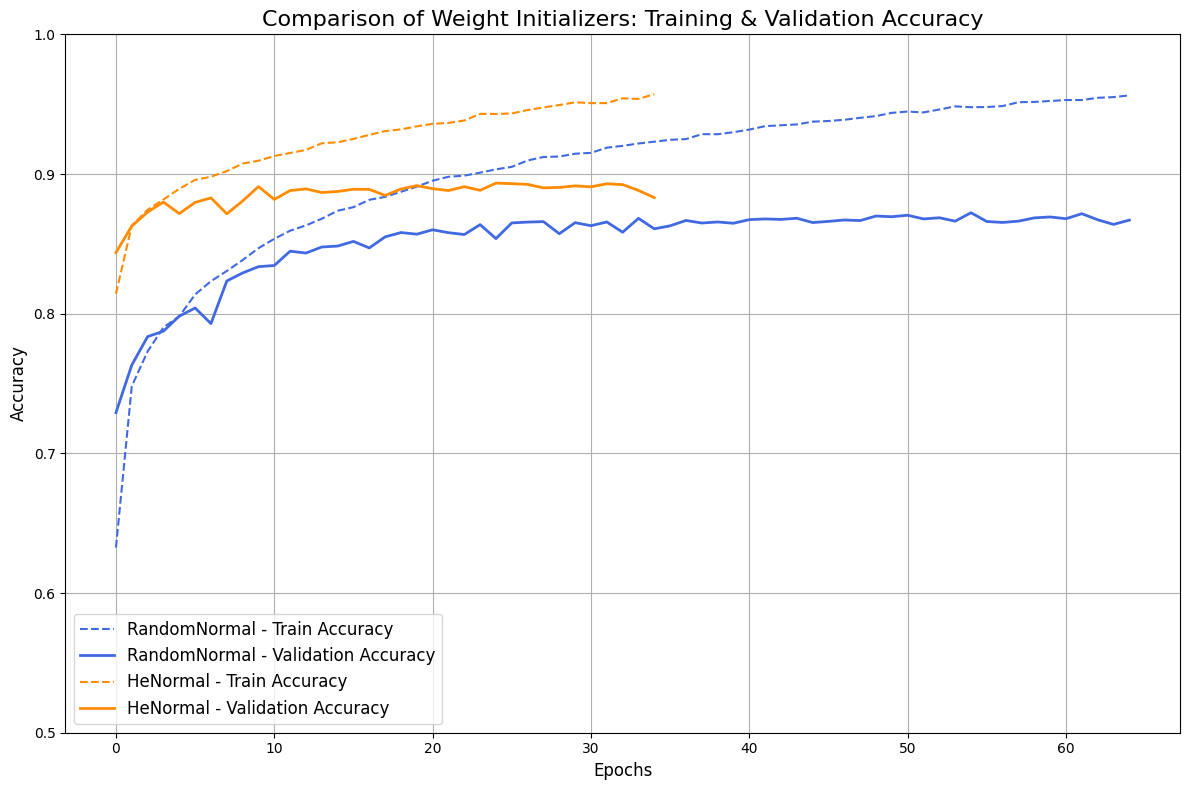

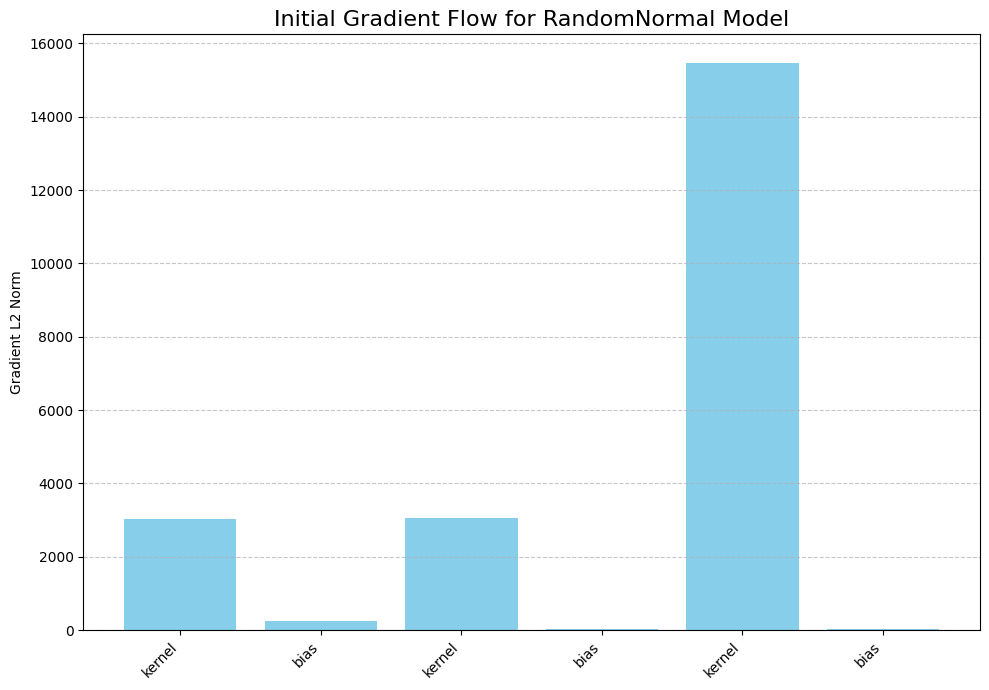

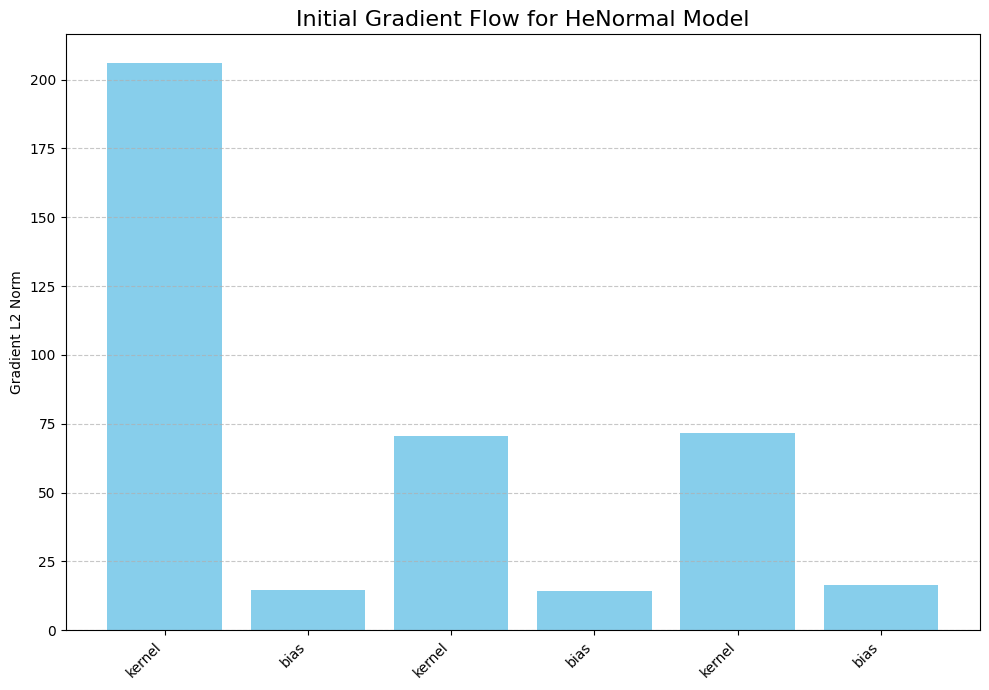

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, initializers, callbacks, losses, optimizers
import matplotlib.pyplot as plt
import numpy as np
import os

# Create a directory to save the plots
if not os.path.exists('plots'):
    os.makedirs('plots')
print("Setup complete. Plots will be saved in the 'plots/' directory.")

# Load Dataset
print("Loading and preprocessing Fashion MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values and flatten the images
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
print("Data preprocessing complete.")


# We define functions to create each model for consistency.

def create_model_random_normal():
    """Builds a model with RandomNormal(stddev=1.0) kernel initializer."""
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(784,)),
        layers.Dense(128, activation='relu',
                     kernel_initializer=initializers.RandomNormal(stddev=1.0)),
        layers.Dense(64, activation='relu',
                     kernel_initializer=initializers.RandomNormal(stddev=1.0)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model_he_normal():
    """Builds a model with HeNormal() initializer for both kernel and bias."""
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(784,)),
        layers.Dense(128, activation='relu',
                     kernel_initializer=initializers.HeNormal(),
                     bias_initializer=initializers.HeNormal()),
        layers.Dense(64, activation='relu',
                     kernel_initializer=initializers.HeNormal(),
                     bias_initializer=initializers.HeNormal()),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("\n--- Training and Comparing Models ---")

# Create instances of the models
model_random = create_model_random_normal()
model_he = create_model_he_normal()

print("Model with RandomNormal(stddev=1.0) Initializer Summary:")
model_random.summary()

print("\nModel with HeNormal() Initializer Summary:")
model_he.summary()


# Define EarlyStopping callback
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10, # Stop after 10 epochs with no improvement in validation accuracy
    restore_best_weights=True,
    verbose=1
)

# Train Model 1
print("\nTraining Model 1 (RandomNormal)...")
history_random = model_random.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

# Train Model 2
print("\nTraining Model 2 (HeNormal)...")
history_he = model_he.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)


# Plots for analysis
print("\n--- Plotting Training vs. Validation Accuracy ---")

plt.figure(figsize=(12, 8))
plt.plot(history_random.history['accuracy'], label='RandomNormal - Train Accuracy', color='royalblue', linestyle='--')
plt.plot(history_random.history['val_accuracy'], label='RandomNormal - Validation Accuracy', color='royalblue', linewidth=2)
plt.plot(history_he.history['accuracy'], label='HeNormal - Train Accuracy', color='darkorange', linestyle='--')
plt.plot(history_he.history['val_accuracy'], label='HeNormal - Validation Accuracy', color='darkorange', linewidth=2)

plt.title('Comparison of Weight Initializers: Training & Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0.5, 1.0) # Set y-axis limits for better visualization
plt.tight_layout()
plt.savefig('plots/accuracy_comparison.png')
print("Accuracy comparison plot saved to 'plots/accuracy_comparison.png'")
# plt.show() # Uncomment to display plot directly


# Gradient Flow analysis
print("\n--- Analyzing Gradient Flow ---")

# Re-create models to analyze gradients from the start of training
model_random_grad = create_model_random_normal()
model_he_grad = create_model_he_normal()

# Use a small subset of data to check initial gradients
x_sample = x_train[:64]
y_sample = y_train[:64]

def get_gradient_norms(model, x, y):
    """Calculates the L2 norm of gradients for each trainable layer."""
    with tf.GradientTape() as tape:
        preds = model(x, training=True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, preds)
    
    grads = tape.gradient(loss, model.trainable_variables)
    grad_norms = [tf.norm(g).numpy() for g in grads]
    return grad_norms

# Get gradient norms for both models
grad_norms_random = get_gradient_norms(model_random_grad, x_sample, y_sample)
grad_norms_he = get_gradient_norms(model_he_grad, x_sample, y_sample)

# Get layer names for plotting
layer_names = [var.name for var in model_random_grad.trainable_variables]

def plot_gradient_flow(norms, model_name):
    """Plots the gradient norms as a bar chart."""
    plt.figure(figsize=(10, 7))
    plt.bar(np.arange(len(norms)), norms, color='skyblue')
    plt.xticks(np.arange(len(norms)), labels=layer_names, rotation=45, ha='right')
    plt.ylabel('Gradient L2 Norm')
    plt.title(f'Initial Gradient Flow for {model_name} Model', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/gradient_flow_{model_name.lower()}.png')
    print(f"Gradient flow plot saved to 'plots/gradient_flow_{model_name.lower()}.png'")
    # plt.show() # Uncomment to display plot directly

plot_gradient_flow(grad_norms_random, 'RandomNormal')
plot_gradient_flow(grad_norms_he, 'HeNormal')

print("\nExercise complete. Check the 'plots/' directory for generated graphs.")
